In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  74681
Columns:  4


In [5]:

df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
df.isnull()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
74676,False,False,False,False
74677,False,False,False,False
74678,False,False,False,False
74679,False,False,False,False


In [8]:
df.isnull().sum() 

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [9]:
df = df.dropna() 

In [10]:
df.isnull().sum()

2401                                                     0
Borderlands                                              0
Positive                                                 0
im getting on borderlands and i will murder you all ,    0
dtype: int64

In [11]:
df.duplicated().sum()

2340

In [12]:
df.drop_duplicates(keep = "first",inplace = True)
df.duplicated().sum()

0

In [13]:
positive = df['Positive'].value_counts()
positive

Positive
Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

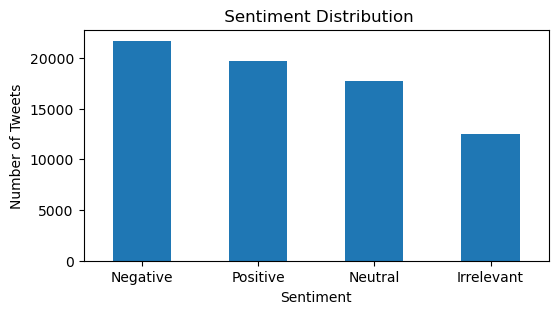

In [14]:
plt.figure(figsize=(6, 3))
positive.plot(kind='bar')
plt.title(' Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [15]:
brand_data = df[df['Borderlands'].str.contains('Amazon', case=False)]
brand_sentiment_counts = brand_data['Positive'].value_counts()
brand_sentiment_counts

Positive
Neutral       1197
Negative       565
Positive       302
Irrelevant     185
Name: count, dtype: int64

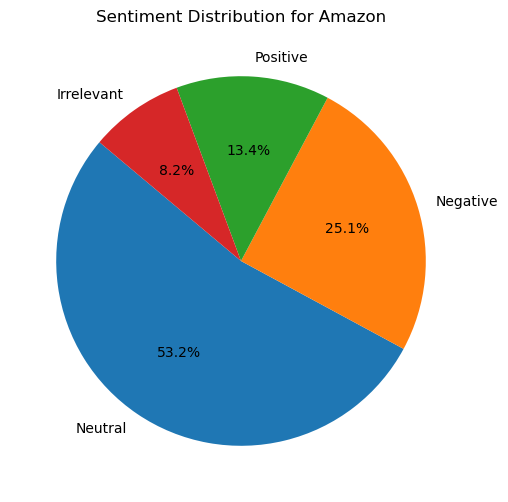

In [16]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Amazon')
plt.show()

<Figure size 1500x800 with 0 Axes>

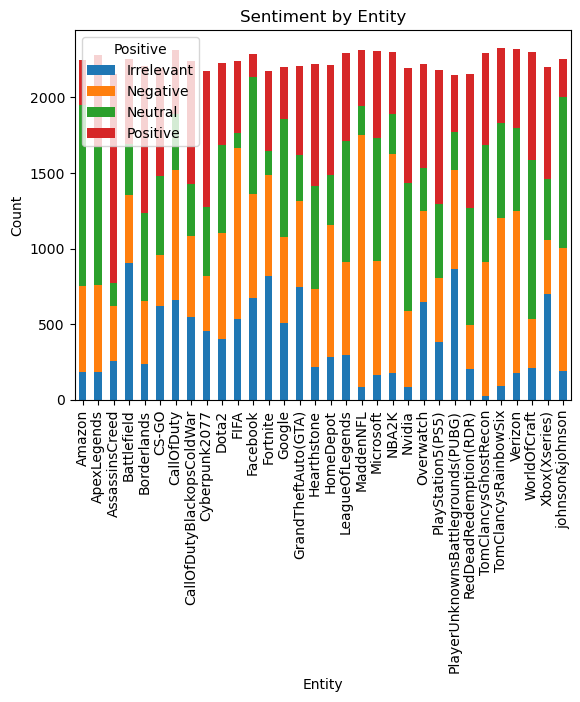

In [17]:
plt.figure(figsize=(15,8))
positive_by_borderlands = df.groupby(['Borderlands', 'Positive']).size().unstack(fill_value=0)
positive_by_borderlands.plot(kind='bar', stacked=True)
plt.title('Sentiment by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.show()